In [2]:
from scipy.stats import norm
import scipy
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[8,6]

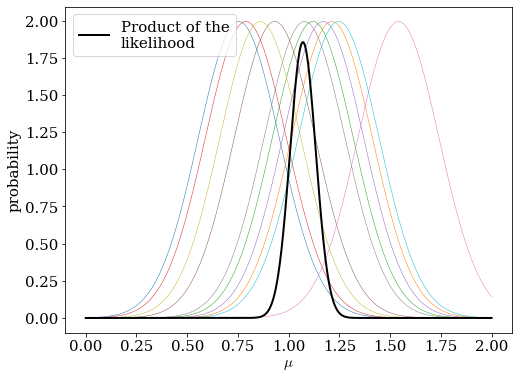

maximum of the likelihood:  1.071
mean of the positions:  1.07


In [15]:
N=10 #number of measurements

#parameters of the gaussian distribution
mu=1
sigma=0.2

#generate the data
x = rnd.normal(loc=mu, scale=sigma, size=N)

x_grid=np.linspace(0,2,1000)

product=1
normaliz=1

#compute the single distributions and the product of the likelihood
for i in range(N):
    gauss = scipy.stats.norm(loc=x[i],scale=sigma)

    plt.plot(x_grid,gauss.pdf(x_grid), lw=0.5)
    product*=gauss.pdf(x_grid)
    normaliz*=gauss.pdf(1)

plt.plot(x_grid, product/normaliz, lw=2, color="black", label="Product of the\nlikelihood")
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.show()

#find the maximum of the likelihood
sort_index=np.argsort(product)
max_index=sort_index[-1]

#and compare the maximum of the likelihood with the estimator given by the mean of the data
print("maximum of the likelihood: ", round(x_grid[max_index],3))
ML_est=np.mean(x)
print("mean of the positions: ", round(ML_est,3))

In [16]:
#compute the second order differentiation of the log-likelihood
log_l_ii=np.diff(np.log(product), n=2)
err_mu=-(log_l_ii/(x_grid[1]-x_grid[0])**2)
err_mu=1/(np.sqrt(err_mu[0]))

print("the error given by the fisher matrix is: ", round(err_mu,3))
ML_est_sigma=sigma/np.sqrt(N)
print("the error estimated cosidering homoscedastic gaussian is: ", round(ML_est_sigma,3))

the error given by the fisher matrix is:  0.063
the error estimated cosidering homoscedastic gaussian is:  0.063


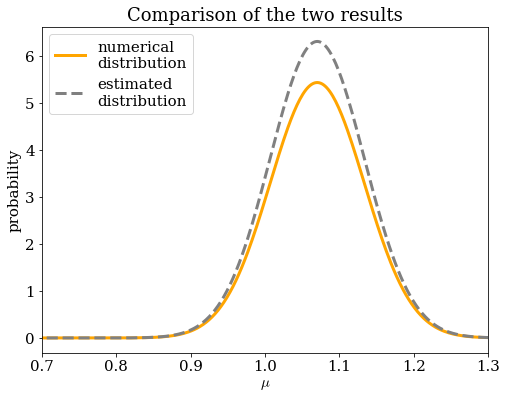

In [24]:
#compare the two results obtained
res_gauss = scipy.stats.norm(loc=ML_est, scale=ML_est_sigma)

plt.plot(x_grid, product*4, label="numerical\ndistribution", lw=3, color="orange")
plt.plot(x_grid,res_gauss.pdf(x_grid), label="estimated\ndistribution", lw=3, ls="--", color="grey")
plt.xlim(0.7,1.3)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.title('Comparison of the two results')
plt.show()

Generalize now the code considering heteroscedastic measurements

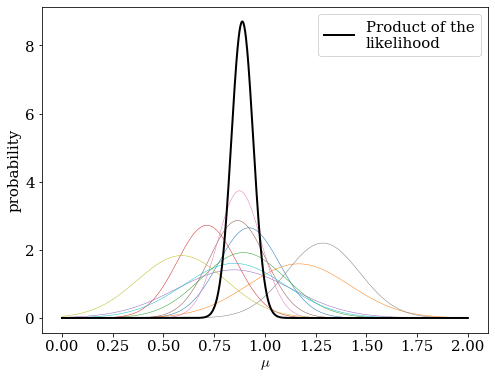

maximum of the likelihood:  0.889
mean of the positions:  0.889


In [29]:
N=10 #number of measurements

#parameters of the gaussian distribution
mu=1
sigma=rnd.normal(loc=0.2, scale=0.05, size=N)

x_grid=np.linspace(0,2,1000)

#generate the data

product=1
normaliz=1
ML_sum=0
err_sum=0

#compute the single distributions and the product of the likelihood
for i in range(N):
    x=rnd.normal(loc=mu, scale=sigma[i], size=1)
    gauss = scipy.stats.norm(loc=x, scale=sigma[i])

    plt.plot(x_grid,gauss.pdf(x_grid), lw=0.5)
    product*=gauss.pdf(x_grid)
    normaliz*=gauss.pdf(1)
    ML_sum+=x/sigma[i]**2
    err_sum+=1/sigma[i]**2

plt.plot(x_grid, product/normaliz, lw=2, color="black", label="Product of the\nlikelihood")
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.show()

#find the maximum of the likelihood
sort_index=np.argsort(product)
max_index=sort_index[-1]

#and compare the maximum of the likelihood with the estimator given by the mean of the data
print("maximum of the likelihood: ", round(x_grid[max_index],3))
ML_est=ML_sum/err_sum
print("mean of the positions: ", round(ML_est[0],3))

In [30]:
#compute the second order differentiation of the log-likelihood
log_l_ii=np.diff(np.log(product), n=2)
err_mu=-(log_l_ii/(x_grid[1]-x_grid[0])**2)
err_mu=1/(np.sqrt(err_mu[0]))

print("the error given by the fisher matrix is: ", round(err_mu,3))
ML_est_sigma=(err_sum)**-0.5
print("the error estimated cosidering heteroscedastic gaussian is: ", round(ML_est_sigma,3))

the error given by the fisher matrix is:  0.054
the error estimated cosidering heteroscedastic gaussian is:  0.054


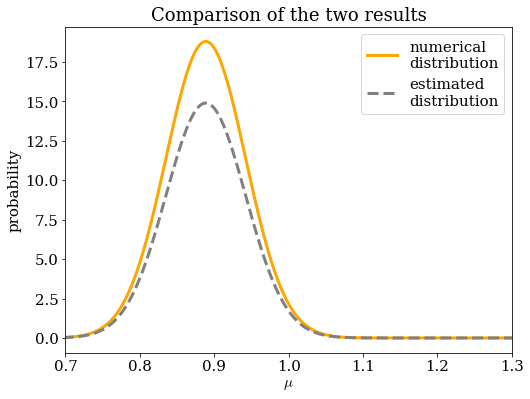

In [32]:
#compare the two results obtained
res_gauss = scipy.stats.norm(loc=ML_est, scale=ML_est_sigma)

plt.plot(x_grid, product, label="numerical\ndistribution", lw=3, color="orange")
plt.plot(x_grid, res_gauss.pdf(x_grid)*2, label="estimated\ndistribution", lw=3, ls="--", color="grey")
plt.xlim(0.7,1.3)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.title('Comparison of the two results')
plt.show()